<a href="https://colab.research.google.com/github/SoniaKoplickat13/Sonia13/blob/main/SW_vs_HP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa.display
import os

import numpy as np
import pandas as pd

import librosa
import librosa.display
import soundfile as sf 

import matplotlib.pyplot as plt
import IPython.display as ipd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def download_url(url, save_path):
    with urllib.request.urlopen(url) as dl_file:
        with open(save_path, 'wb') as out_file:
            out_file.write(dl_file.read())

In [ ]:
url  = "https://drive.google.com/drive/folders/1hKH9P49F0FdDFet22WWLvn4hf7CjYbl8?usp=sharing"
save_path = '/content/drive/MyDrive/Data1/BasicSolution1.zip'
download_url(url,save_path)

In [ ]:
path = '/content/drive/MyDrive/Data1/BasicSolution1'
os.listdir(path)

['S198_whistle_2_StarWars.wav',
 'S122_hum_2_StarWars.wav',
 'S198_hum_2_StarWars.wav',
 'S122_whistle_2_StarWars.wav',
 'S190_hum_2_StarWars.wav',
 'S190_whistle_2_StarWars.wav',
 'S201_hum_3_StarWars.wav',
 'S201_hum_4_StarWars.wav',
 'S100_hum_4_StarWars.wav',
 'S100_hum_3_StarWars.wav',
 'S200_hum_2_StarWars.wav',
 'S196_hum_4_StarWars.wav',
 'S131_whistle_2_StarWars.wav',
 'S196_hum_3_StarWars.wav',
 'S88_hum_2_StarWars.wav',
 'S131_hum_2_StarWars.wav',
 'S200_whistle_2_StarWars.wav',
 'S88_hum_1_StarWars.wav',
 'S21_hum_4_StarWars.wav',
 'S176_hum_2_StarWars.wav',
 'S176_whistle_2_StarWars.wav',
 'S21_hum_3_StarWars.wav',
 'S84_hum_4_StarWars.wav',
 'S216_hum_4_StarWars.wav',
 'S216_hum_3_StarWars.wav',
 'S84_hum_3_StarWars.wav',
 'S187_hum_2_StarWars.wav',
 'S63_hum_4_StarWars.wav',
 'S26_hum_3_StarWars.wav',
 'S26_hum_4_StarWars.wav',
 'S187_whistle_2_StarWars.wav',
 'S111_hum_3_StarWars.wav',
 'S111_hum_4_StarWars.wav',
 'S164_hum_2_StarWars.wav',
 'S53_hum_4_StarWars.wav',
 '

In [ ]:

directory_to_extract_to = '/content/drive/MyDrive/Data1/BasicSolution1/'
zip_path = '/content/drive/MyDrive/Data1/BasicSolution1.zip'

#with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    #zip_ref.extractall(directory_to_extract_to)

sample_path = '/content/drive/MyDrive/Data1/BasicSolution1/*.wav'
files = glob.glob(sample_path)
len(files)


834

In [ ]:
for _ in range(5):
  n = np.random.randint(24)
  display(ipd.Audio(files[n]))

In [ ]:
for file in files:
  print(file.split('/')[-1])

S198_whistle_2_StarWars.wav
S122_hum_2_StarWars.wav
S198_hum_2_StarWars.wav
S122_whistle_2_StarWars.wav
S190_hum_2_StarWars.wav
S190_whistle_2_StarWars.wav
S201_hum_3_StarWars.wav
S201_hum_4_StarWars.wav
S100_hum_4_StarWars.wav
S100_hum_3_StarWars.wav
S200_hum_2_StarWars.wav
S196_hum_4_StarWars.wav
S131_whistle_2_StarWars.wav
S196_hum_3_StarWars.wav
S88_hum_2_StarWars.wav
S131_hum_2_StarWars.wav
S200_whistle_2_StarWars.wav
S88_hum_1_StarWars.wav
S21_hum_4_StarWars.wav
S176_hum_2_StarWars.wav
S176_whistle_2_StarWars.wav
S21_hum_3_StarWars.wav
S84_hum_4_StarWars.wav
S216_hum_4_StarWars.wav
S216_hum_3_StarWars.wav
S84_hum_3_StarWars.wav
S187_hum_2_StarWars.wav
S63_hum_4_StarWars.wav
S26_hum_3_StarWars.wav
S26_hum_4_StarWars.wav
S187_whistle_2_StarWars.wav
S111_hum_3_StarWars.wav
S111_hum_4_StarWars.wav
S164_hum_2_StarWars.wav
S53_hum_4_StarWars.wav
S70_hum_3_StarWars.wav
S164_hum_1_StarWars.wav
S177_hum_4_StarWars.wav
S177_hum_3_StarWars.wav
S19_hum_3_StarWars.wav
S70_hum_4_StarWars.wav
S

In [ ]:
print('The full path to the first audio file is: ', files[0])
print('\n')
print('The name of the first audio file is: ', files[0].split('/')[-1])
print('    The participand ID is: ', files[0].split('/')[-1].split('_')[0])
print('    The type of interpretation is: ', files[0].split('/')[-1].split('_')[1])
print('    The interpretation number is: ', files[0].split('/')[-1].split('_')[2])
print('    The song is: ', files[0].split('/')[-1].split('_')[3])

The full path to the first audio file is:  /content/drive/MyDrive/Data1/BasicSolution1/S198_whistle_2_StarWars.wav


The name of the first audio file is:  S198_whistle_2_StarWars.wav
    The participand ID is:  S198
    The type of interpretation is:  whistle
    The interpretation number is:  2
    The song is:  StarWars.wav


In [ ]:
BasicSolution_table = [] 

for file in files:
  file_name = file.split('/')[-1]
  participant_ID = file.split('/')[-1].split('_')[0]
  interpretation_type = file.split('/')[-1].split('_')[1]
  interpretation_number = file.split('/')[-1].split('_')[0]
  song = file.split('/')[-1].split('_')[3].split('.')[0]
  BasicSolution_table.append([file_name,participant_ID,interpretation_type,interpretation_number, song])

BasicSolution_table

[['S198_whistle_2_StarWars.wav', 'S198', 'whistle', 'S198', 'StarWars'],
 ['S122_hum_2_StarWars.wav', 'S122', 'hum', 'S122', 'StarWars'],
 ['S198_hum_2_StarWars.wav', 'S198', 'hum', 'S198', 'StarWars'],
 ['S122_whistle_2_StarWars.wav', 'S122', 'whistle', 'S122', 'StarWars'],
 ['S190_hum_2_StarWars.wav', 'S190', 'hum', 'S190', 'StarWars'],
 ['S190_whistle_2_StarWars.wav', 'S190', 'whistle', 'S190', 'StarWars'],
 ['S201_hum_3_StarWars.wav', 'S201', 'hum', 'S201', 'StarWars'],
 ['S201_hum_4_StarWars.wav', 'S201', 'hum', 'S201', 'StarWars'],
 ['S100_hum_4_StarWars.wav', 'S100', 'hum', 'S100', 'StarWars'],
 ['S100_hum_3_StarWars.wav', 'S100', 'hum', 'S100', 'StarWars'],
 ['S200_hum_2_StarWars.wav', 'S200', 'hum', 'S200', 'StarWars'],
 ['S196_hum_4_StarWars.wav', 'S196', 'hum', 'S196', 'StarWars'],
 ['S131_whistle_2_StarWars.wav', 'S131', 'whistle', 'S131', 'StarWars'],
 ['S196_hum_3_StarWars.wav', 'S196', 'hum', 'S196', 'StarWars'],
 ['S88_hum_2_StarWars.wav', 'S88', 'hum', 'S88', 'StarWars

In [ ]:
BasicSolution_df = pd.DataFrame(BasicSolution_table,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
BasicSolution_df

,participant,interpretation,number,song
file_id,,,,
S198_whistle_2_StarWars.wav,S198,whistle,S198,StarWars
S122_hum_2_StarWars.wav,S122,hum,S122,StarWars
S198_hum_2_StarWars.wav,S198,hum,S198,StarWars
S122_whistle_2_StarWars.wav,S122,whistle,S122,StarWars
S190_hum_2_StarWars.wav,S190,hum,S190,StarWars
...,...,...,...,...
S42_hum_2_Potter.wav,S42,hum,S42,Potter
S42_hum_2_StarWars.wav,S42,hum,S42,StarWars
S42_hum_3_Potter.wav,S42,hum,S42,Potter


Up to here we are creating a dataset from the data that we pulled out of the google drive

In [ ]:
n=0
fs = None # Sampling frequency. If None, fs would be 22050
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

In [ ]:
BasicSolution_df.loc[files[n].split('/')[-1]]

participant           S198
interpretation     whistle
number                S198
song              StarWars
Name: S198_whistle_2_StarWars.wav, dtype: object

In [ ]:
n=0
x, fs = librosa.load(files[n],sr=fs)
print('This audio signal has', len(x), 'samples')

This audio signal has 833631 samples


In [ ]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [ ]:
def getEnergy(x,fs,winLen=0.02):
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  energy = np.array([sum(abs(x[i:i+frame_length]**2))for i in range(0, len(x), hop_length)])
  
  return energy

In [ ]:
def getRMS(x,fs,winLen=0.02):
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  rms = librosa.feature.rms(x, frame_length=frame_length, hop_length=hop_length, center=True)
  return rms

In [ ]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = labels_file.loc[fileID]['song']=='Potter'

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
    energy = getEnergy(x,fs,winLen=0.02)
    rms = getRMS(x,fs,winLen=0.02)

      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)

    energy_mean = np.mean(getEnergy)
    energy_std = np.std(getEnergy)
    rms_mean = np.mean(getRMS)
    rms_std = np.std(getRMS)
    
    
  


    xi = [power,pitch_mean,pitch_std,voiced_fr, energy_mean, energy_std, rms_mean, rms_std]
    X.append(xi)
    y.append(yi)

  return np.array(X),np.array(y)

In [ ]:
X,y = getXy(files, labels_file=BasicSolution_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 834/834 [41:21<00:00,  2.98s/it]


In [ ]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)


The shape of X is (834, 4)
The shape of y is (834,)
The labels vector is [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [ ]:
print(' The number of Potter recordings is ', np.count_nonzero(y))
print(' The number of StarWars recordings is ', y.size - np.count_nonzero(y))

 The number of Potter recordings is  417
 The number of StarWars recordings is  417


## SVC

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((667, 4), (167, 4), (667,), (167,))

In [ ]:
model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.5697151424287856
Validation  Accuracy 0.5568862275449101
The support vectors are (634, 4)


In [ ]:
mean = X_train.mean(0)
sd =  X_train.std(0)

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

model  = svm.SVC(C=1,gamma=2)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

# Predicting the Test set results
y_pred = classifier.predict(X_val)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_val,y_pred)
cm = confusion_matrix(y_val, y_pred)
print(ac)
print(cm)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

0.5568862275449101
[[15 66]
 [ 8 78]]
Training Accuracy 0.7796101949025487
Validation  Accuracy 0.6646706586826348
The support vectors are (556, 4)


## NAIVE BAYES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
print(ac)
print(cm)

0.49800796812749004
[[ 16 113]
 [ 13 109]]


## K-FOLD CROSS VALIDATION 

>SVC: ideal=0.942, cv=0.942
>GaussianNB: ideal=0.826, cv=0.819
Correlation: 1.000


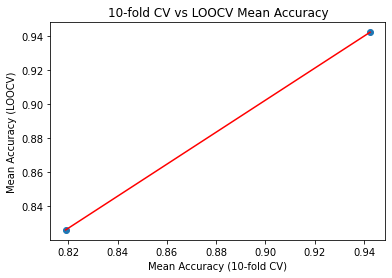

In [ ]:
# correlation between test harness and ideal test condition
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier

# create the dataset
def get_dataset(n_samples=834):
	X, y = make_classification(n_samples=n_samples, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y

# get a list of models to evaluate
def get_models():
	models = list()
	models.append(SVC())
	models.append(GaussianNB())
	return models

# evaluate the model using a given test condition
def evaluate_model(cv, model):
	# get the dataset
	X, y = get_dataset()
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return mean(scores)

# define test conditions
ideal_cv = LeaveOneOut()
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# get the list of models to consider
models = get_models()
# collect results
ideal_results, cv_results = list(), list()
# evaluate each model
for model in models:
	# evaluate model using each test condition
	cv_mean = evaluate_model(cv, model)
	ideal_mean = evaluate_model(ideal_cv, model)
	# check for invalid results
	if isnan(cv_mean) or isnan(ideal_mean):
		continue
	# store results
	cv_results.append(cv_mean)
	ideal_results.append(ideal_mean)
	# summarize progress
	print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))
# calculate the correlation between each test condition
corr, _ = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)
# scatter plot of results
pyplot.scatter(cv_results, ideal_results)
# plot the line of best fit
coeff, bias = polyfit(cv_results, ideal_results, 1)
line = coeff * asarray(cv_results) + bias
pyplot.plot(cv_results, line, color='r')
# label the plot
pyplot.title('10-fold CV vs LOOCV Mean Accuracy')
pyplot.xlabel('Mean Accuracy (10-fold CV)')
pyplot.ylabel('Mean Accuracy (LOOCV)')
# show the plot
pyplot.show()
	
